## GPU Programming: Perform vector and matrix operations in CUDA

### Environment Setup

You can run this notebook on either Colab or clone the github repo to your virtual machine with GPU.

In [ ]:
### This script is used to clone the repository to the google drive and setup the directory
from google.colab import drive
import os

drive_path = '/content/drive' 
drive.mount(drive_path)
workspace_path = os.path.join(drive_path, "MyDrive/workspace/11868hw")
!mkdir -p {workspace_path}
%cd {workspace_path}
git_repo_name = "llmsys_code_examples"
repo_path = os.path.join(workspace_path, git_repo_name)
if os.path.isdir(os.path.join(repo_path, ".git")):
  %cd {git_repo_name}
  !git pull
else: 
  !git clone https://github.com/llmsystem/llmsys_code_examples.git
%cd {repo_path}/cuda_acceleration_demo

### Compile and Run CUDA Code

We will implment a program for tiled matrix multiplication in CUDA. 
The following code snippt is from `matmul_tile.cu`. Please fill in the blanks. 

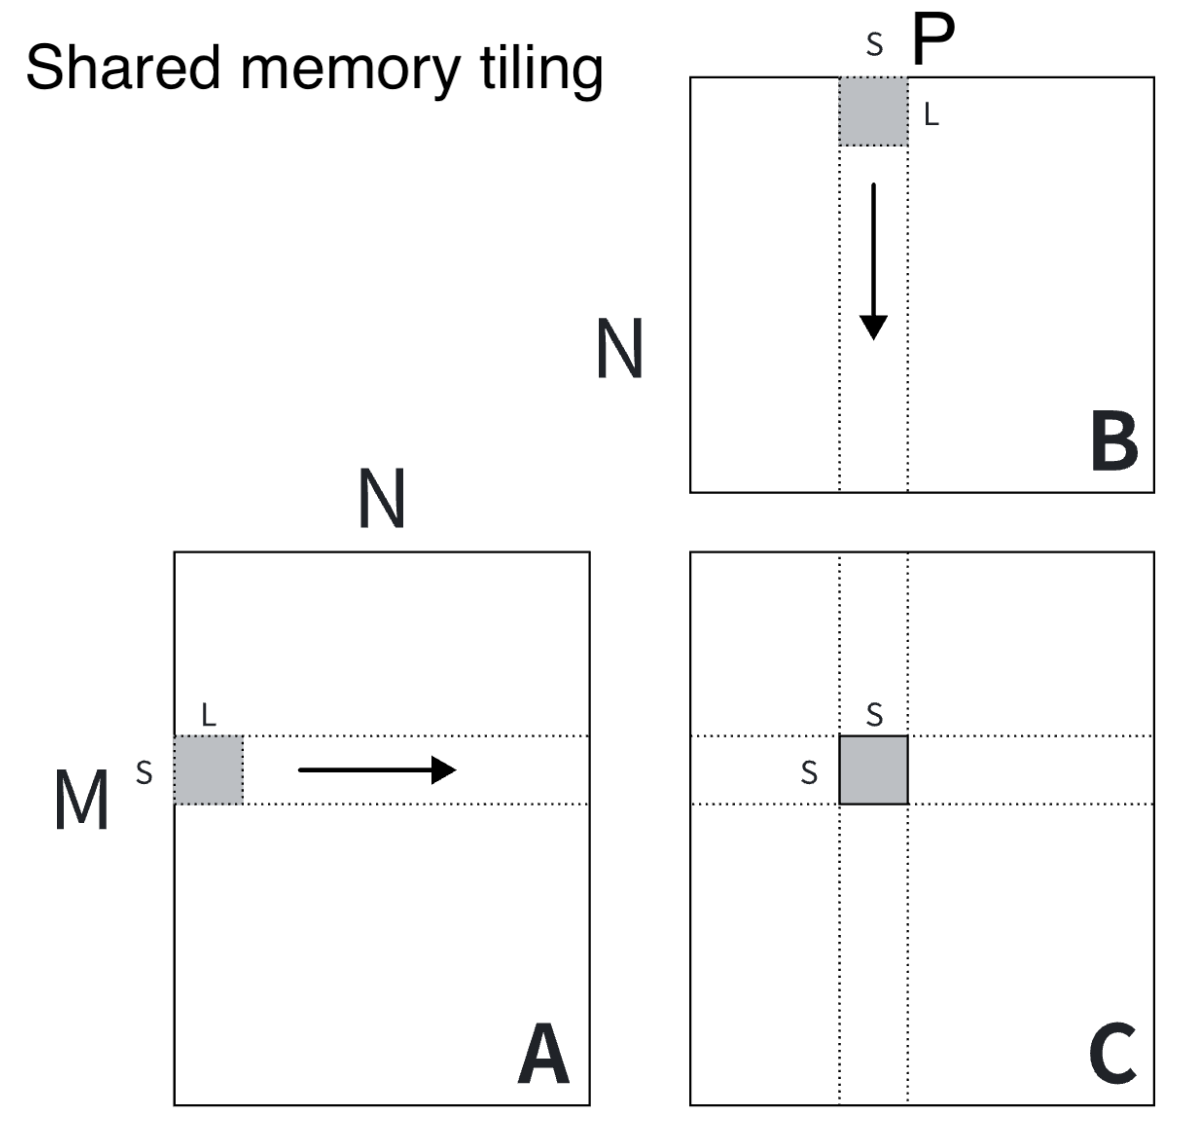

```cpp

__global__ void MatMulTiledKernel(float* d_A, float* d_B, float* d_C, int N) {
    // define two matrices in share memory


    // define the row and column in the result matrix of current thread


    // iterate over tiles along row and column in d_A and d_B



    // store result

    
}

```

Run the following command (you may use the commented command to run your own version)

In [ ]:
# Compile the codes for matrix addition
# uncomment the following line to compile your implemented version 
# %nvcc -o matmul_tile matmul_tile.cu -O3

!nvcc -o matmul_bench matmul_tile_full.cu -O3

zsh:1: command not found: nvcc


Run the following command to check the result: 

In [ ]:
# Py packages for visualization
import pandas as pd
import matplotlib.pyplot as plt
import io

# data
output = !./matmul_bench
data = "\n".join([line for line in output if line.count(",") == 2])
print(data)
df = pd.read_csv(io.StringIO(data), names=['Size', 'Naive_ms', 'Tiled_ms'], header=None)


# plot
plt.figure(figsize=(12, 7))
plt.plot(df['Size'], df['Naive_ms'], marker='o', label='Naive Kernel')
plt.plot(df['Size'], df['Tiled_ms'], marker='s', label='Tiled Kernel (32x32)')

plt.title('Naive vs. Tiled Performance', fontsize=14)
plt.xlabel('Matrix Dimension (N)', fontsize=12)
plt.ylabel('Exec Time (ms)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## Further Questions and Explanations


---


### Why does the speedup increase as N increases?
As N increases, the number of data grows by a factor of N^2, hence, requiring exponentially more global memory reads.

Furthemore, depending on the GPU architecture, there is a L2 cache.

In our case, T4 GPU has a 6 MB L2 cache.

We can solve for the maximal N that can fit in the L2 cache (assuming 4 byte floating point numbers), via: 6 MB = N x N x 4 Bytes, or N ~= 1224. Since memory bandwidth from L2 to registers is much faster than main memory to registers, Naive performs well comparatively to the Optimized.

---

### How would we get better speedup?

Similar to tiling, there is something called `register tiling`. This is, essentially, another level of tiling where we place our data at the register level instead of just using shared memory. It's like a `cache for the cache`.

Other techinques include double (or even triple) buffering in libraies such as `cuBLAS`. These are much more advanced and aren't necessary for your homework assignments (but you are free to do your own research and try to implement them).